In [2]:
import numpy as np
import subprocess
import os

DELETE_TEMP = False

temp_inp = '''
!B3LYP 6-31G* Opt NumFreq

%elprop
Polar 1
end

*xyz 0 1
O    -0.5447    1.3323   -0.0013
N     0.6985   -0.6359    0.0058
C    -0.4701    0.1063    0.0070
C     2.0143   -0.0386   -0.0057
C    -1.6980   -0.7641   -0.0059
H     0.6423   -1.6500   -0.0141
H     2.6279   -0.5471    0.7418
H     1.9657    1.0301    0.2163
H     2.4489   -0.1908   -0.9966
H    -2.5800   -0.1596    0.2234
H    -1.8162   -1.2127   -0.9959
H    -1.6122   -1.5549    0.7449
*
'''

ORCA_PATH = "/home/yzhang/App/orca-6.0.0/orca_6_0_0_shared_openmpi416/"
ORCA_EXEC = ORCA_PATH+"orca"
ORCA_MAPSPC = ORCA_PATH+"orca_mapspc"

INP = "orca_inp.tmp"
OUT = "orca_out.tmp"
RAMAN_DATA_STK = OUT+".raman.stk"
RAMAN_DATA_CONV = OUT+".raman.dat"

with open(INP,"w") as f:
    f.writelines(temp_inp)


with open(OUT,"w") as f_o:
    subprocess.run([ORCA_EXEC, INP], stdout=f_o)  # run orca calculation
    
subprocess.run([ORCA_MAPSPC, OUT, "raman", "-w50"]) # generate Raman spectrum data

if DELETE_TEMP:
    os.remove(INP)
    os.remove(OUT)

Cannot read the paras.inp file ... 
    taking the line width parameter from the command line 
Number of peaks            ...   0
Start wavenumber [cm-1]     ...   5000.0
Stop wavenumber [cm-1]      ...  40000.0
Peak FWHM [cm-1]             ...  1500.00
Number of points           ...   1024


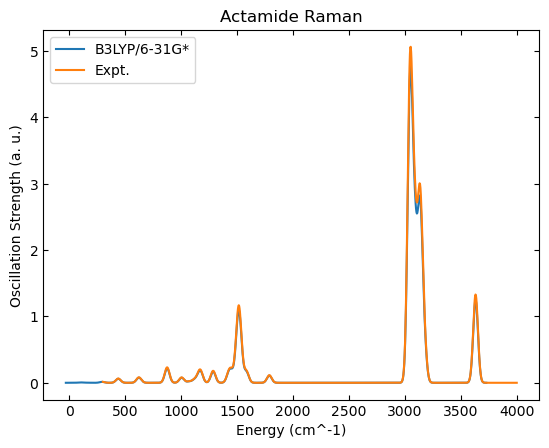

In [13]:
# import plot code
from importlib import reload # reload function, not necessary if the module is stable
import ConvolutionPlot # the module must be imported after the reload function
                       # must import the module, not the functions in the module!!!
reload(ConvolutionPlot) # reload the updated module
from ConvolutionPlot import * # import the functions

RAMAN_DATA_STK = OUT+".raman.stk"
RAMAN_DATA_CONV = OUT+".raman.dat"

DELETE_DATA = False

ConvPlot_Vib(gamma = 50.0, PlotTitle = "Actamide Raman", PlotLabel = "B3LYP/6-31G*", 
            profile = 2, nsets = 2, ExptDataFile = RAMAN_DATA_CONV, DataFileName = RAMAN_DATA_STK,
            ScaleExpt = 0.02)
             
if DELETE_DATA:
    os.remove(RAMAN_DATA_STK)
    os.remove(RAMAN_DATA_CONV)

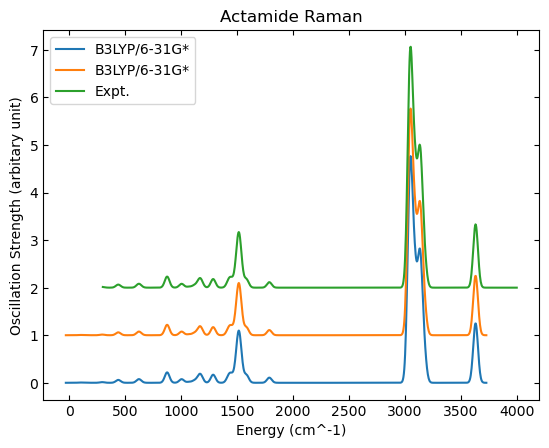

In [22]:
# Test plot function for multiple curves
from importlib import reload # reload function, not necessary if the module is stable
import ConvolutionPlot # the module must be imported after the reload function
                       # must import the module, not the functions in the module!!!
reload(ConvolutionPlot) # reload the updated module
from ConvolutionPlot import * # import the functions

ConvPlot(SpecType = 3, gamma = 50.0, PlotTitle = "Actamide Raman", PlotLabel = ["B3LYP/6-31G*", "B3LYP/6-31G*"], 
            profile = 2, ExptDataFile = RAMAN_DATA_CONV, DataFileNames = [RAMAN_DATA_STK, RAMAN_DATA_STK],
            ScaleExpt = 0.02, ScaleCurves = [1.0, 1.0], VShifts = [0.0, 1.0, 2.0])